![](cover.png)

# 決策樹(分類)

## 介紹
讓我們從決策樹開始進入機器學習的入門，決策樹的概念非常的簡單，就是每次選擇一個特徵，將你的資料分成多個部分

## 例子
如果一個女生的擇偶條件，第一個條件是年齡在x歲之下，再接下來的第二個條件是要會彈吉他，這個判定的條件就很有決策樹的感覺，所以決策樹其實就是一層層條件的篩選！


## 優點
1. 建立起來的模型非常符合人類的直覺(先選一個特徵來做出分類)，也非常容易解釋

## 缺點
1. 容易發生過擬合(Overfitting)的現象，也就是做出來的樹對於離群點(特立獨行的點)也想辦法納入考慮了，那這樣正常的資料就有機會無法被正常的分類

## ✔ 分割理論
既然現在我們想要透過特徵來做出分割，問題就變成了到底要用哪個特徵來分割比較適合！

### 情境假設

現在我們假設我們想預測一個人是不是軟體設計師，我們有兩個特徵，特徵一：戴眼鏡與否，特徵二：手指有繭與否

寫的更清楚一點:

1. 輸入1: 戴眼鏡與否(只有是否兩個值)
2. 輸入2: 手指有繭與否(只有是否兩個值)
3. 輸出: 工程師與否(只有是否兩個值)

那接下來想請教各位一個問題

情境1: 假設我們用戴眼鏡與否分出來以後長成這樣

![](fig1.png)

情境2: 假設我們用手指長繭與否分出來以後長成這樣

![](fig2.png)

究竟該選擇哪一個作為我們的分類特徵呢？聰明如你應該也發現了，情境2有分跟沒分是一樣的啊！！工程師與非工程師的分布還是一半一半

那接下來我們用比較清楚的表示來描述一下上面這件事

### 特徵選擇以及亂度

***亂度: 不確定性***

根據人類物理學研究，發現如果一個系統沒有外界的介入，會傾向於整體能量低(穩定)，內部不確定性高(自由)的方向發展，我們不用物理學的方向說，我們以歷史的角度說，我們歷史上的朝代在沒有外界的介入下，發展出了多樣化的職業(自由度高，不確定性高)，這些多樣化的職業構成了穩定的時代(穩定度高)。

回到我們的預測，不確定性高代表裡面可能性太多，對於我們的預測來說，因為可能性太多，就只能純粹瞎猜。所以我們在選擇特徵的時候，要反過來，盡量在切割後讓整個系統的不確定性低，才不是單純在瞎猜。

***熵(Entropy): 衡量亂度的一個方式***

E(某種可能性) = log(某種可能性的機率) = log(某種可能性的數量/全部數量)

G(分類後得到的系統增益) = E(原本亂度) - E(後來的亂度)

接下來我們針對上面的兩個圖來算一下總體的熵

情境1: 用戴眼鏡與否分得到的增益

![](fig4.png)

情境2: 用手指長繭與否分得到的增益

![](fig3.png)

*** 毫無疑問，我選擇增益多的情境1(戴眼鏡與否)當我們的分類特徵 ***

*** 只要不斷的重複這步驟，我們就可以把我們樹創建出來 ***

## ✔ 決策樹的歷史

### ID3決策樹: 

根據我們上面的理論，每次就選一個特徵，把特徵所有可能的值分出不同的群出來

但有個很大的問題是，ID3決策樹會傾向於選擇特徵值可能性最多的來當劃分

舉例來說，假設你有個特徵是學號，那ID3幾乎百分百會選擇學號來當劃分的基礎

因為值最多相當於畫出來最多個子樹，亂度當然會比較小

### C4.5決策樹: 

為了解決上面ID3的缺點，我們引入了一個懲罰項，把廣度和均勻度納入考量，不要讓樹分成太多個子節點，但每個節點只有少數幾個資料

### CART(Classification And Regression Tree)樹:

CART樹是我們最後發展出來的樹，也是scikit-learn所使用的樹演算法，他最重要的特點是

***每次劃分一定只劃分出兩個子節點***

這樣劃分的話，上面的問題就不存在了，因為每一次的劃分都是分出左右兩個，而不會分出超級多個節點

而且，最重要的是

***這樣的劃分，也讓CART樹可在很好的利用在迴歸問題上，我們下一節就來看看迴歸的問題***

## ✔ 開始撰寫程式

### Step 0. 讀入我們的鳶尾花數據集作為練習


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 為了顯示的漂亮, 我刻意的把印出來的row只顯示15個和column只顯示十個, 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

# 使用scikit-learn提供的鳶尾花資料庫
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2


### Step 1. 先畫個圖

***相關係數: 兩個東西的相關性***

完全正相關(兩個東西總是一起上升): 1

完全正相關(一個東西上升的時候, 另一個總是下降): -1

我們先使用heatmap(根據不同的數值給你不同的顏色)，並且把我們的鳶尾花數據做出一個相關係數矩陣，丟入我們的heatmap

補充：你可以使用 https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html 選擇一個你喜歡的調色盤放入cmap參數

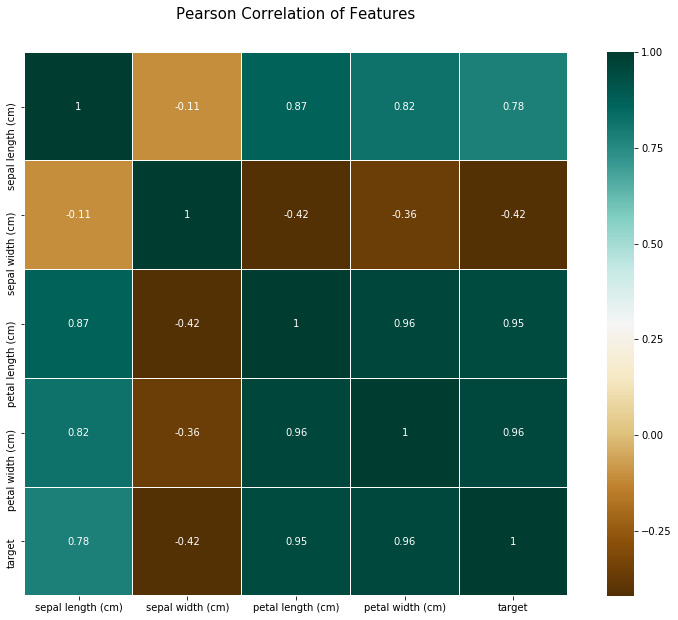

In [2]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), cmap = "BrBG", 
            linewidths=0.1, square=True, linecolor='white', 
            annot=True)

在這裡我們可以先有了一個小小的想法，對於我們資料集，我們先看一下最下面的一列，我們發現，對於我們的目標來說，花瓣是一個非常重要的資訊，不管是長度和寬度對於我們的目標分類都是幾乎完全的正相關，所以理論上，之後我們的樹應該會選擇花瓣作為分類基準

In [3]:
# 我們把我們擁有的資料集分成兩份, 一份測試, 一份訓練
from sklearn.model_selection import train_test_split
# 把資料分成兩部分(1. 訓練資料 2. 測試資料)
data_train, data_test, target_train, target_test = train_test_split(iris['data'], 
                                                                    iris['target'], 
                                                                    test_size=0.1)

### Step 2. 訓練模型

我們使用DecisionTreeClssifier來訓練

在使用sklearn的時候我們都會用下面兩步驟來訓練

1. 創好一個Classifier
2. 使用fit將你要訓練的數據餵進來

In [4]:
from sklearn.tree import DecisionTreeClassifier


# 我們先試試看讓樹的最大深度是3
clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(data_train, target_train)

訓練完畫個圖吧，我們使用第三方軟體graphviz以及python函式庫來操作graphviz

請完成下面的安裝步驟
1. 請來到 http://www.graphviz.org/download/ 安裝graphviz到你的電腦
2. 請使用pip或者是pycharm安裝好graphviz函式庫

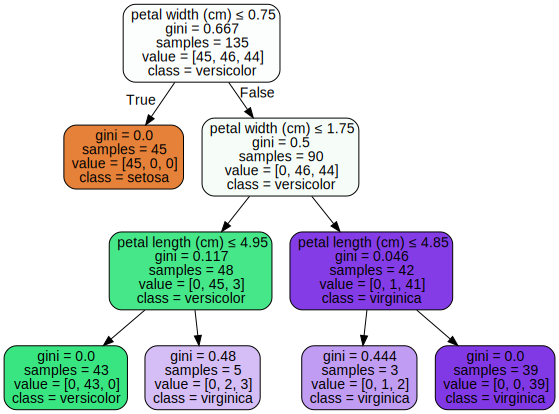

In [5]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
# 這行可以輸出一個pdf, 讀者可以自行把註解拿掉試試看
# graph.render("iris2")
graph

你發現，在選擇標籤的時候，的確以花瓣的長寬做為我們的主要選擇就可以達到幾乎完美的分類程度。

### Step 3. 開始預測

使用你剛剛的classifier進行predict，predict完成以後使用sklearn內建的accuracy_score來算出正確機率

In [6]:
from sklearn.metrics import accuracy_score

predict = clf.predict(data_test)
print("預測:", predict)
print("正確標籤:", target_test)
print("正確率: ", accuracy_score(target_test, predict) * 100, "%")


預測: [0 0 2 1 1 2 2 0 0 2 2 1 1 0 1]
正確標籤: [0 0 2 1 2 2 2 0 0 2 2 1 1 0 1]
正確率:  93.3333333333 %


### Step 4. 確認一下分類錯誤

你可以使用混淆矩陣(confusion matrix)來判斷正確的分類以及不正確的分類

像下面的圖，列是你的正確標籤，行則是你的預測，當你的列數字不等於行數字的時候就是分類錯誤的情況

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, predict)
pd.DataFrame(cm)

,0,1,2
0,5,0,0
1,0,4,0
2,0,1,5


最後的最後，你可以檢查一下我們做出來的分類器，對於每個特徵的看重程度

你會發現，跟我們一開始由圖預測的一樣，花瓣(後兩個)的重要程度比花萼(前兩個)來的重要太多了

In [8]:
clf.feature_importances_ 

array([ 0.        ,  0.        ,  0.04456771,  0.95543229])

## ✔ 剪枝

現在，我們回去調整一下你的Classifier的depth，你會發現，深度的提升並不一定是件好事

深度的提升代表你用了更多個特徵，甚至是一些根本無用或者是比較特異的特徵(記得，我們預測是針對大群體)來做出分類

這件事情我們叫做過擬合，換成現實的話，就是你考慮了太多意外的要素或根本不重要的要素

我們有兩種方法來解決這困境

1. 深度的設置，也就是剪枝，有兩種的設置方法，前剪枝或後剪枝
2. 森林(隨機森林)的設置，利用多個只比亂猜好一點點的樹(稍稍大於50%即可)，讓他們投票，選出大家都同意的結果，我們會在後續提到這方法

### 前剪枝

其實就是我們剛剛所做的，預先設置最大深度，不讓你的決策樹超過最大深度

但你也發現了，這根本沒有一個公式可以來算出深度的設置怎樣才合理，只能使用經驗法則，或是一層層試過，試出最佳深度

### 後剪枝(scikit-learn沒有提供方法)

後剪枝的概念是無論如何能做多深就多深，最後我們再來一個一個節點把它試試刪掉

如果刪掉一個節點對我們的預測精確度無影響的話，我們就真的把它刪除掉

但scikit-learn並沒有提供後剪枝的方法，我們可以期待在以後會有提供後剪枝的API